In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
#load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Data science & Analytics\Machine learning\cardekho.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
#checking missing values per column and the percentage
missing = df.isnull().sum()
percentage_missing = round((missing/len(df)) * 100, 2)
data_dict = {"missing_value_count": missing,
             "missing_value_percentage": percentage_missing}
missing_df = pd.DataFrame(data_dict)
missing_df

,missing_value_count,missing_value_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [4]:
#Drop any rows where the target variable (selling price) is missing
df['selling_price'].isnull().sum()
df.dropna(subset=["selling_price"], inplace= True)

In [5]:
#Fill missing values in the “mileage” column with the column’s mean.
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

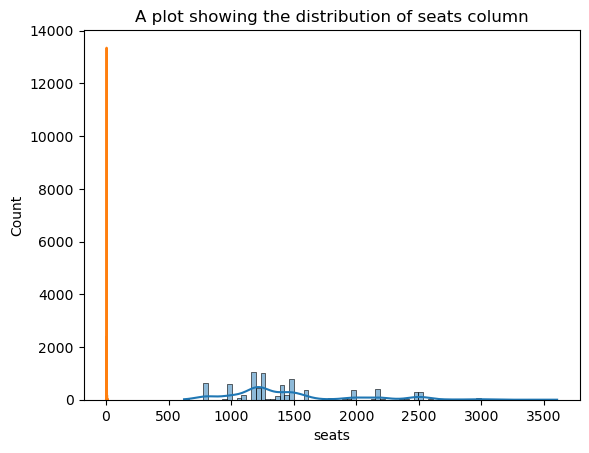

In [6]:
#visualizing engine & seats
Missing_columns = ["engine", "seats"]
for col in Missing_columns:
    plt.Figure(figsize=(15,5))
    sns.histplot(df, x=df[col], kde=True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)

In [7]:
#Filling missing values with median
for col in Missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the  missing values for: {col}")
    print("*"*100)

Fill the  missing values for: engine
****************************************************************************************************
Fill the  missing values for: seats
****************************************************************************************************


In [8]:
#fill missing values (engine power) with mode
med = df["max_power"].mode()
print(med)

0    74
Name: max_power, dtype: object


In [9]:
df['max_power'] = df['max_power'].str.strip("'\"")

In [10]:
df["max_power"].replace(['', "nan"," ","None"], np.nan, inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6000\2034514615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].replace(['', "nan"," ","None"], np.nan, inplace= True)


In [11]:
df["max_power"] = pd.to_numeric(df["max_power"])

In [12]:
med = df["max_power"].median()
print(med)

82.0


In [13]:
df["max_power"] = df["max_power"].fillna(df["max_power"].median())

In [14]:
#checking duplicated rows
df.duplicated().sum()

1202

In [15]:
df = df.drop_duplicates()

In [16]:
df.drop_duplicates().sum

<bound method DataFrame.sum of                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
8121  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
8122         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
8123                  Hyundai i20 Magna  2013         320000     110000   
8124              Hyundai Verna CRDi SX  2007         135000     119000   
8125             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  \
0    

In [17]:
df.duplicated().sum()

0

In [18]:
#converting year to car Age 
df["car_age"] = (2025-df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [19]:
#unique values in fuel column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [20]:
#Replace inconsistent values in the “transmission” column
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
df["transmission"] = df["transmission"].str.capitalize()
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


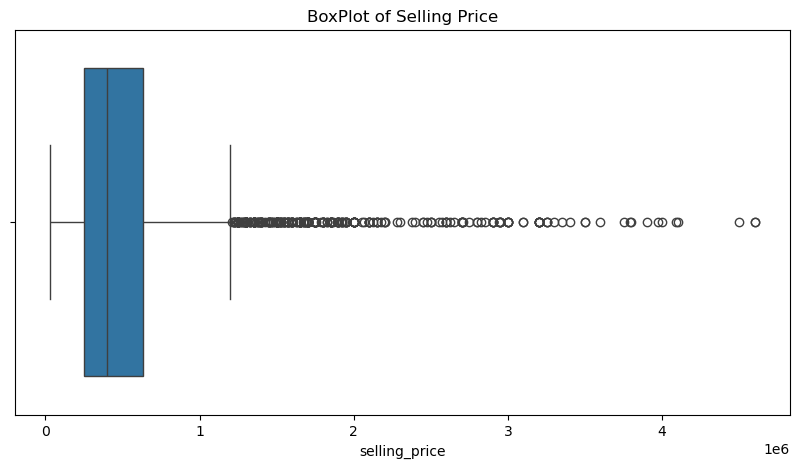

In [61]:
#Check if there are any outliers in the “selling price” column using a boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['selling_price'])
plt.title("BoxPlot of Selling Price")
plt.show()


In [23]:
#Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
df_filtered = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
df_filtered.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [24]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces.
df_filtered.columns = df.columns.str.lower()
df_filtered.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [25]:
#Check if any numerical columns are stored as strings and convert them to numbers.


In [26]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage.
df_filtered['price per km'] = df_filtered['selling_price']/ (df_filtered['mileage(km/ltr/kg)'])
df_filtered.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6000\3194430216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['price per km'] = df_filtered['selling_price']/ (df_filtered['mileage(km/ltr/kg)'])


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price per km
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [27]:
#Ensure the dataset index is properly reset after cleaning.
df_filtered = df_filtered.reset_index(drop=True)

In [28]:
#Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
df_filtered.to_csv('cleaned_cars.csv', index=False)

#### Exploratory Data Analysis (EDA) (16–30)

In [29]:
df = pd.read_csv(f"cleaned_cars.csv")

In [30]:
#Find the average selling price of cars in the dataset
avg_price = df['selling_price'].mean()
avg_price

501378.18114682887

In [31]:
#Find the most common fuel type in the dataset.
df['fuel'].value_counts()

fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64

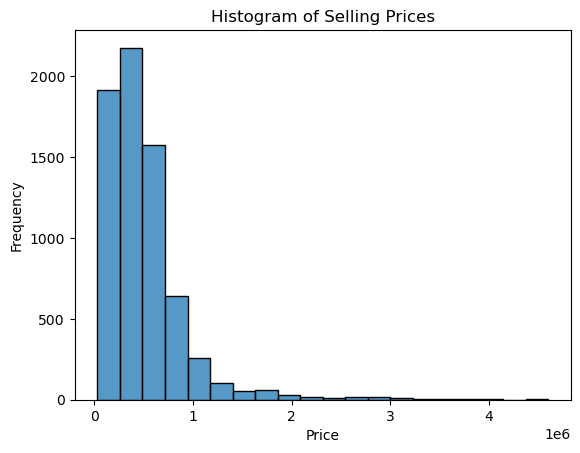

In [32]:
#Plot a histogram of the selling prices
sns.histplot(df["selling_price"], bins=20, edgecolor='black')
plt.title("Histogram of Selling Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

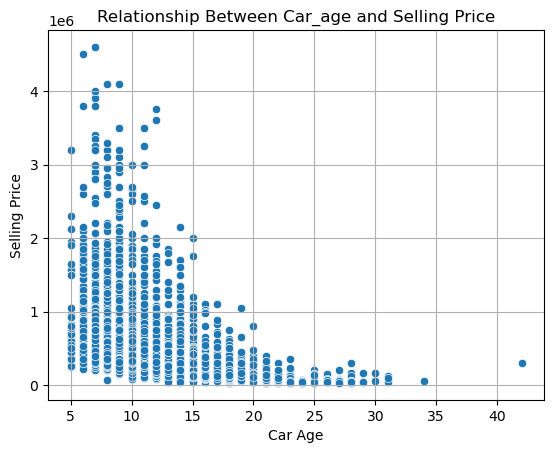

In [33]:
#Plot the relationship between car age and selling price using a scatter plot.
plt.Figure(figsize = (10, 6))
sns.scatterplot(data=df, x='car_age', y='selling_price')
plt.title("Relationship Between Car_age and Selling Price")
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [34]:
#Group cars by fuel type and find the average selling price for each group.
Avg_selling_price = df.groupby('fuel')['selling_price'].mean()
Avg_selling_price

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64

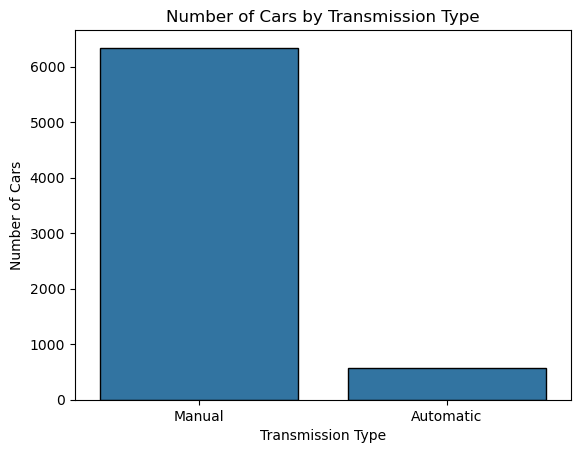

In [35]:
#Plot a bar chart showing the number of cars per transmission type.

plt.Figure(figsize=(10, 6))
sns.countplot( data=df, x='transmission', edgecolor='black')
plt.title("Number of Cars by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.show()

In [36]:
#Find the car with the highest mileage in the dataset.
Highest_mileage = df.loc[df["mileage(km/ltr/kg)"].idxmax()]
Highest_mileage

name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                         40.3
seats                                              4.0
car_age                                              6
price per km                               9868.421053
Name: 35, dtype: object

In [37]:
#Calculate the correlation between mileage and selling price.
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
correlation

-0.12069849273188767

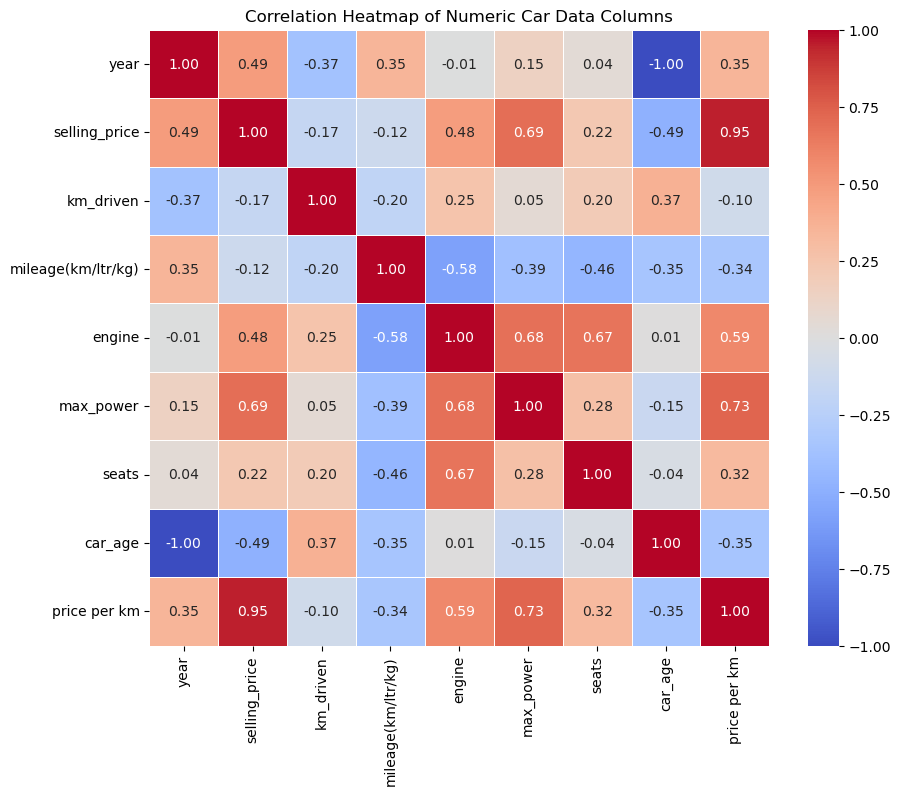

In [38]:
#Plot a heatmap showing the correlations between all numeric columns.
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Car Data Columns')
plt.show()


In [39]:
#Check if manual cars are generally cheaper or more expensive than automatic cars.
car_price = df.groupby('transmission')['selling_price'].mean().sort_values(ascending=True)
car_price

transmission
Manual       4.442991e+05
Automatic    1.143215e+06
Name: selling_price, dtype: float64

In [62]:
#Find the average selling price for each year of manufacture.
avg_price_per_year = df.groupby('year')['selling_price'].mean().sort_values(ascending=False)
avg_price_per_year

year
2018    825749.553897
2019    795583.291667
2020    786548.338710
2017    708006.173913
2016    653180.339105
2015    589177.625551
2014    511858.798623
2013    451501.724199
2012    351387.379139
2011    318335.696751
1983    300000.000000
2010    273897.334211
2009    227691.620833
2008    208397.639024
2007    174894.505682
2006    164383.308943
2005    137994.494505
2004    109364.250000
1995    107500.000000
2002     99153.807692
2003     97034.021277
1997     90181.727273
2000     90047.850000
1994     88000.000000
1996     81666.666667
1998     73100.000000
1999     71470.588235
1991     55000.000000
2001     47220.333333
Name: selling_price, dtype: float64

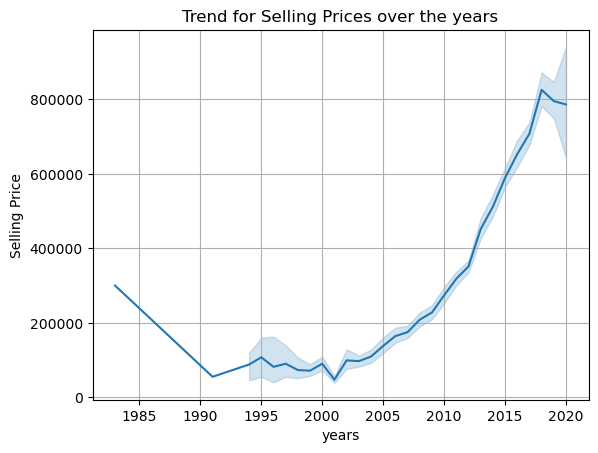

In [41]:
#Plot a line chart showing the trend of selling prices over the years.
plt.Figure(figsize=(10, 8))
sns.lineplot(data=df, x='year', y='selling_price')
plt.title("Trend for Selling Prices over the years")
plt.xlabel("years")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [42]:
#Find the most expensive car for each fuel type.
most_exp = df.loc[df.groupby('fuel')['selling_price'].idxmax()]
print(most_exp['fuel'], ['selling_price'])


4961       CNG
283     Diesel
2783       LPG
133     Petrol
Name: fuel, dtype: object ['selling_price']


In [43]:
#Find out which brand appears most frequently in the dataset.
df['brand'] = df['name'].apply(lambda x: x.split()[0])
most_frequent_brand = df['brand'].value_counts().idxmax()
most_frequent_brand

'Maruti'

In [44]:
#Check the top 5 most common combinations of fuel type and transmission.
top_combinations = (df.groupby(['fuel', 'transmission']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5))
top_combinations

,fuel,transmission,count
2,Diesel,Manual,3457
5,Petrol,Manual,2791
1,Diesel,Automatic,284
4,Petrol,Automatic,280
0,CNG,Manual,56


#### Machine Learning (31–40)

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

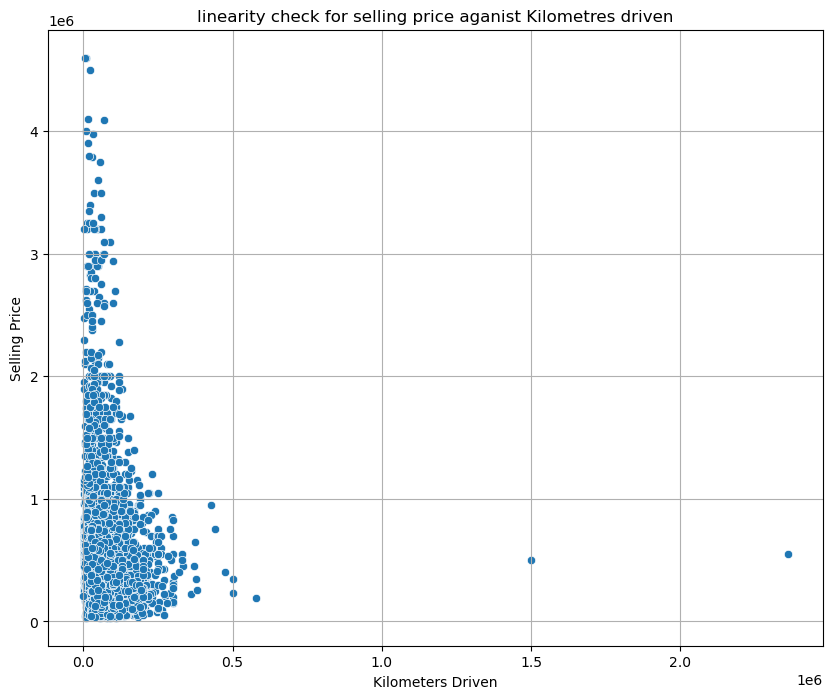

In [ ]:
#check for linearity
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title("linearity check for selling price aganist Kilometres driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

In [47]:
#checking for other assumptions through regression model
#Define dependent and independent variables for model 
X = df.drop(['selling_price', 'name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'seats', 'price per km', 'brand'], axis=1)
y = df['selling_price']

In [48]:
#fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [49]:
# predict values and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred
print("Predictions:", y_pred, "Residuals:", residuals)


Predictions: [372274.59164722 648659.22105795 105192.00291659 ... 430284.92242472
 439803.91676055 192646.7343007 ] Residuals: 0        77725.408353
1      -278659.221058
2        52807.997083
3      -146561.159074
4      -114238.345087
            ...      
6901    -58073.952993
6902    -60461.001053
6903   -110284.922425
6904   -304803.916761
6905    189353.265699
Name: selling_price, Length: 6906, dtype: float64


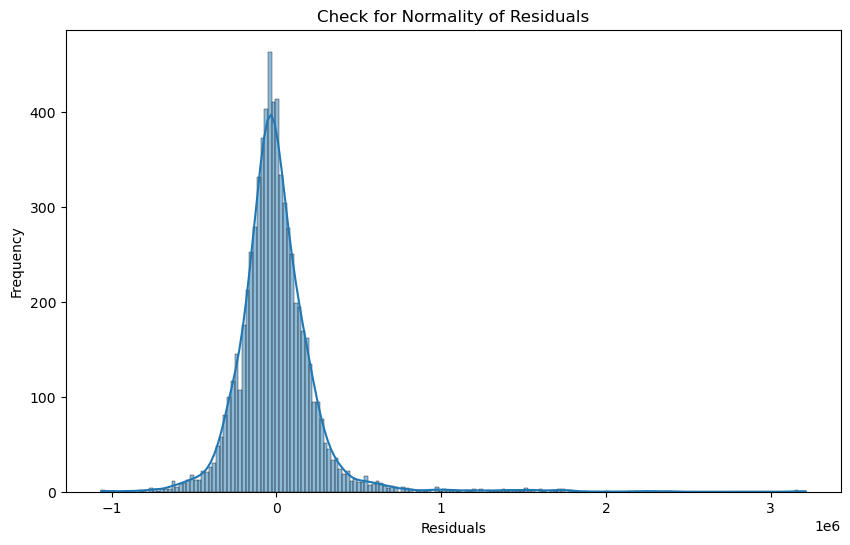

In [ ]:
#Check for Normality of Residuals 
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title("Check for Normality of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

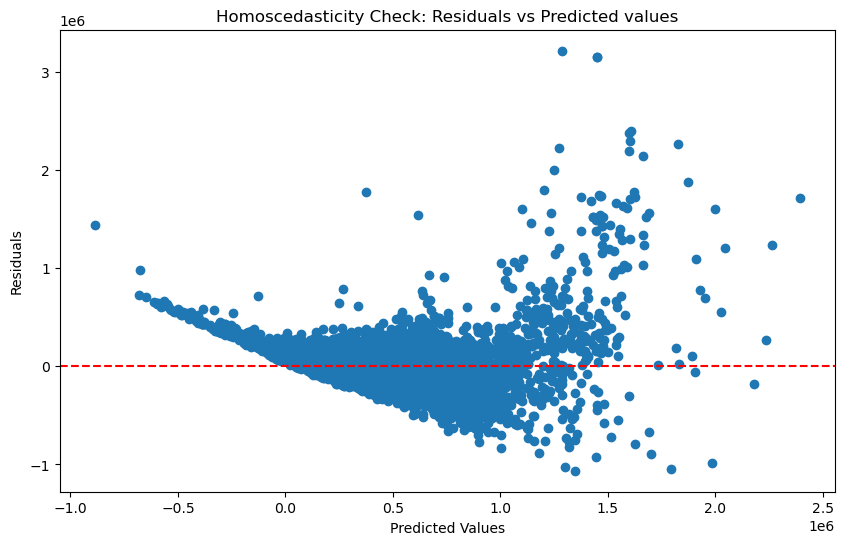

In [ ]:
#checking for Homoscedasticity
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.title("Homoscedasticity Check: Residuals vs Predicted values")
plt.axhline(y=0, color = 'red', linestyle ='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [52]:
#Train a Linear Regression model 
#Split the dataset into train/test sets, train the model, and print the coefficients and intercept.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model 
model = LinearRegression()

#Train model using training data
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

#print model coefficient & Intercept
print("Predictions:", model_pred)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Predictions: [540796.50555266 681899.46041602 418574.94710107 ... 399243.35895461
 639212.67560336 360616.37221293]
Coefficient: -0.43660894849665216
Intercept: 193868.3822575924


In [53]:
#Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
r2 = r2_score(y_test, model_pred)
MSE = mean_squared_error(y_test, model_pred)
print("r-Squared(r2):", r2)
print("LinearRegression MSE:", MSE)

r-Squared(r2): 0.6309392373280224
LinearRegression MSE: 66988901467.61663


In [54]:
# Apply Lasso Regression on the dataset and compare its performance with Linear Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)

#Evaluate lasso model
lasso_MSE = mean_squared_error(y_test, lasso_pred)
print("lasso MSE:", lasso_MSE)


lasso MSE: 66988901324.86288


In [55]:
#Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

#Evaluate the model
ridge_MSE = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_MSE)

Ridge MSE: 66988893806.14567


In [56]:
#Use cross-validation to evaluate your Ridge Regression model.
from sklearn.model_selection import cross_val_score, KFold

# Perform 5-fold cross-validation using R² as the scoring metric
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the R² score for each fold and the mean/standard deviation
print("R2 Scores for each fold:", cv_scores)
print("Mean R2 Score:", {np.mean(cv_scores)})
print("Standard Deviation of R2 Scores:", {np.std(cv_scores)})


R2 Scores for each fold: [0.60765165 0.63020466 0.65238393 0.61232064 0.62552924]
Mean R2 Score: {0.6256180233591321}
Standard Deviation of R2 Scores: {0.015729399087826713}


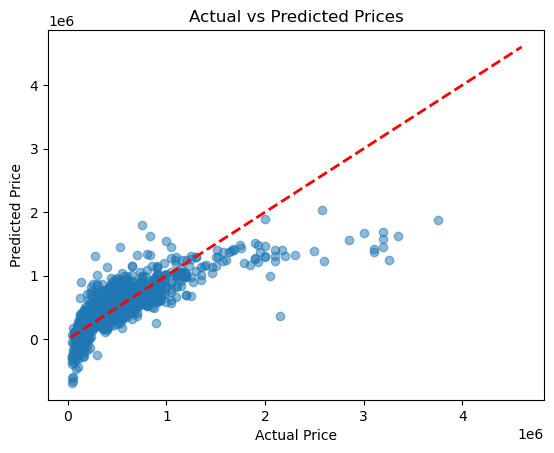

In [57]:
#Plot the predicted vs actual prices for your best-performing model.
# Create the plot of predicted vs. actual prices
plt.Figure(figsize=(10,8))
plt.scatter(y_test, ridge_pred, alpha=0.5)
# Plot a diagonal line representing a perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [58]:
#Use GridSearchCV to find the best alpha value for Ridge Regression.
#import library
from sklearn.model_selection import GridSearchCV

#ridge regression model
ridge_model = Ridge()

#define range of alpha values to test
alpha_values = np.logspace(-2, 2, 50) #from 0.01 to 100

#create the parameter grid
parameter_grid = {'alpha': alpha_values}

#Set up GridSearchCV with 5-fold cross-validation and R² scoring
grid_search = GridSearchCV(ridge_model, parameter_grid, cv=5, scoring='r2')

#fit the grid search to the data
grid_search.fit(X,y)

#get the best alpha value & corresponding best score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("The best alpha value found is:", best_alpha)
print("The best R2 score for the optimal alpha is:", best_score)



The best alpha value found is: 0.01
The best R2 score for the optimal alpha is: 0.6256180837284488


In [59]:
# Try Polynomial Regression on the dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#create a linear regression model on the polynomial features
poly_model = LinearRegression()

#Train the model
poly_model.fit(X_train_poly, y_train)

#make predictions
poly_y_pred = poly_model.predict(X_test_poly)

## Calculate the R² Score and MSE for the Polynomial Regression model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

print("R2 Score:", poly_r2)
print("Polynomial Regression MSE:", poly_mse)


R2 Score: 0.7859655387013207
Polynomial Regression MSE: 38849790844.211845
